# ---------------------------------- Imports ----------------------------------

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

from knac_helpers import prepareDf2, myPlot1, myPlot2, make_blobs_weights, generate_weights, display_side_by_side, split, merge

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import umap

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans

In [4]:
import pandas as pd
import numpy as np

In [5]:
from knac import KNAC

#  ---------------------------------- Helpers ----------------------------------

In [6]:
random_state = 170

In [7]:
def prepare_splits_df(splits):
    if (splits.empty):
        return pd.DataFrame(columns = ['clusters', 'confidence'])
    
    splits = splits.to_frame()
    splits = splits['split'].apply(lambda x: pd.Series(x))
    splits.rename(columns={0:'clusters', 1:'confidence'}, inplace=True)
    return splits

def print_test_results(s_10, s, s_silhouette, m, m_metrics, dataset_name):
    print_for_single = display
    print_for_many = display_side_by_side

    print('''
####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --''')
    
    s_10_df = prepare_splits_df(s_10)
    s_df = prepare_splits_df(s)
    s_silhouette_df = prepare_splits_df(s_silhouette)
    
    print_for_many(s_10_df, s_df, s_silhouette_df)
    
    print('''
####################################
############## MERGES ##############
####################################
''')
        
    print('standard merges')
    print_for_single(m)
    
    print('\nmerges (with linkage criterion)\n------ single link ------ avg. link ------ complete link ------ centroids ------ ward\'s\n')
    print_for_many(*m_metrics)

In [8]:
def test_splitmerge_without_plot(df, X, Y, E, dataset_name):
    knac = KNAC()
    knac.fit(df)
    
    # ------------------ splits ------------------
    
    s_10 = knac.splits(threshold_override=0.2)
    s = knac.splits(threshold_override=0.6)
    s_silhouette = knac.splits(threshold_override=0.6, 
                               silhouette_metric={
                                   'weight': 0.5, 
                                   'data': X, 
                                   'labels_automatic': Y, 
                                   'labels_expert': E
                               })
    
    
    # ------------------ merges ------------------
    m = knac.merges()
    metrics = ['single_link', 'average_link', 'complete_link', 'centroids_link', 'wards_link']
    m_metrics = []
    
    for metric in metrics:
        m_ = knac.merges(clusters_linkage_metric={
            'weight': 0.2,
            'metric': metric, 
            'data': X, 
            'labels_expert': E            
        })
        m_metrics.append(m_)
    
    
    # ------------------ printing all ------------------
    print_test_results(s_10, s, s_silhouette, m, m_metrics, dataset_name)
    
    return (s_10, s, s_silhouette)

def test_splitmerge(X, Y, E, dataset_name, centersY=None, centersE=None, patches=None):
    df = prepareDf2(E, Y)
    knac = KNAC()
    knac.fit(df)
    
    h_sm = knac.H_conf2
    
    myPlot1(X, Y, E, dataset_name=dataset_name, centersY=centersY, centersE=centersE, patches=patches, heatmap_matrix=h_sm, heatmap_matrix_type='split')
    
    test_splitmerge_without_plot(df, X, Y, E, dataset_name)

# ------------------------------

In [9]:
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True)
plt.rc('grid', color='w', linestyle='solid')

# ---------------------------------- Examples ----------------------------------

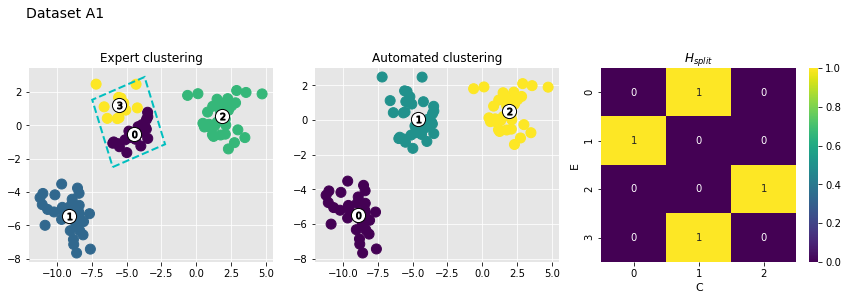


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
,clusters,confidence
,clusters,confidence



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity
1,0,3,1.0



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's



,C1,C2,similarity
1,0,3,0.983777
,C1,C2,similarity
1,0,3,0.980793
,C1,C2,similarity
1,0,3,0.979155
,C1,C2,similarity
1,0,3,0.966338
,C1,C2,similarity
1,0,3,0.989502


In [10]:
X1, Y1, centers1 = make_blobs(n_features=2, centers=3, random_state=random_state, return_centers=True)

clusterer4 = KMeans(n_clusters=4, random_state=random_state)
E4 = clusterer4.fit_predict(X1)

rect0 = patches.Rectangle((-6,-2.5),4,4.3,angle=20,ec='c', fc="None", ls='--', linewidth=2, clip_on=False)
_ = test_splitmerge(X1, Y1, E4, 'A1', centers1, clusterer4.cluster_centers_, patches={'E': [rect0]})


# ------------------------------


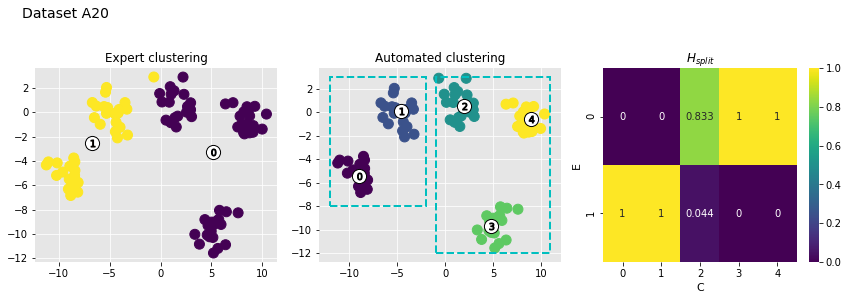


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
0,"(2, 3, 4)",0.944404
1,"(0, 1)",1.000000
,clusters,confidence
0,"(2, 3, 4)",0.944404
1,"(0, 1)",1.000000
,clusters,confidence
0,"(2, 3, 4)",0.735472
1,"(0, 1)",0.742815



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's



,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity


In [11]:
X20, Y20, centers20 = make_blobs(n_features=2, centers=5, random_state=random_state, return_centers=True)

clusterer20 = KMeans(n_clusters=2, random_state=random_state)
E20 = clusterer20.fit_predict(X20)

rect0 = patches.Rectangle((-12,-8),10,11,angle=0,ec='c', fc="None", ls='--', linewidth=2, clip_on=False)
rect1 = patches.Rectangle((-1,-12),12,15,angle=0,ec='c', fc="None", ls='--', linewidth=2, clip_on=False)
_ = test_splitmerge(X20, Y20, E20, 'A20', centers20, clusterer20.cluster_centers_, patches={'C': [rect0, rect1]})


# ------------------------------


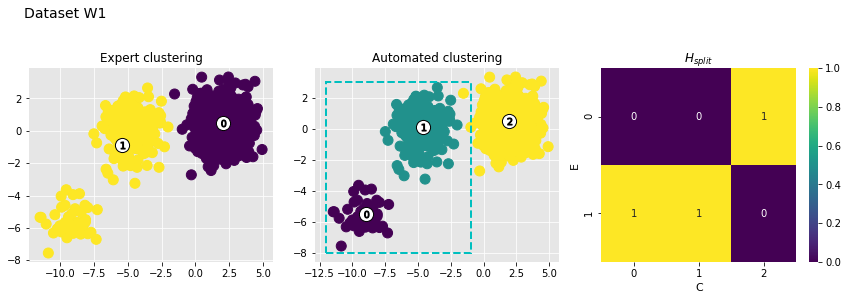


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
1,"(0, 1)",1.0
,clusters,confidence
1,"(0, 1)",1.0
,clusters,confidence
1,"(0, 1)",0.75



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's



,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity


In [12]:
np.random.seed(random_state + 1)
X1_w, Y1_w, centers1_w = make_blobs_weights(weights=[0.05, 0.25, 0.7], n_samples=1000, n_features=2, centers=3, random_state=random_state, return_centers=True)
clusterer1_w = KMeans(n_clusters=2, random_state=random_state)
E1_w = clusterer1_w.fit_predict(X1_w)

rect0 = patches.Rectangle((-12,-8),11,11,angle=0,ec='c', fc="None", ls='--', linewidth=2, clip_on=False)
_ = test_splitmerge(X1_w, Y1_w, E1_w, 'W1', centers1_w, clusterer1_w.cluster_centers_, patches={'C': [rect0]})

# ------------------------------

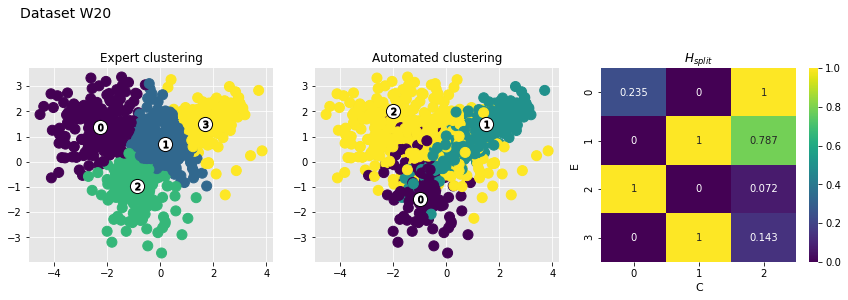


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
0,"(0, 2)",0.617700
1,"(1, 2)",0.893461
,clusters,confidence
1,"(1, 2)",0.893461
,clusters,confidence
1,"(1, 2)",0.683931



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity
2,1,3,0.880077



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's



,C1,C2,similarity
2,1,3,0.897209
,C1,C2,similarity
2,1,3,0.859648
,C1,C2,similarity
2,1,3,0.875676
,C1,C2,similarity
2,1,3,0.81746
,C1,C2,similarity
2,1,3,0.840455


In [13]:
np.random.seed(random_state + 10)
weights = generate_weights(size=3)

X20_w, Y20_w = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_classes=3,
                             n_clusters_per_class=1, random_state=random_state + 10, weights=weights)

clusterer20_w = KMeans(n_clusters=4, random_state=random_state)
E20_w = clusterer20_w.fit_predict(X20_w)
centers20_w_Y = np.array([[-1, -1.5], [1.5, 1.5], [-2, 2]])
_ = test_splitmerge(X20_w, Y20_w, E20_w, 'W20', centers20_w_Y, clusterer20_w.cluster_centers_)

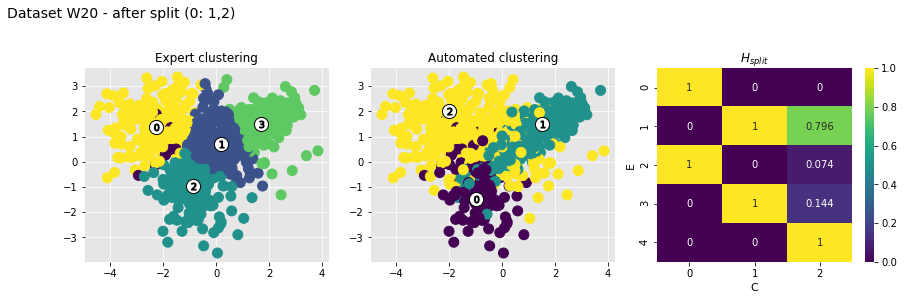


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
1,"(1, 2)",0.897776
,clusters,confidence
1,"(1, 2)",0.897776
,clusters,confidence
1,"(1, 2)",0.687766



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity
1,0,2,0.861123
3,1,3,0.880077



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's



,C1,C2,similarity
1,0,2,0.864812
3,1,3,0.900053
,C1,C2,similarity
1,0,2,0.826231
3,1,3,0.854704
,C1,C2,similarity
1,0,2,0.808088
3,1,3,0.835943
,C1,C2,similarity
2,1,3,0.817961


In [14]:
E20_w_s1 = split(E20_w, Y20_w, row=0, col1=1, col2=2)
_ = test_splitmerge(X20_w, Y20_w, E20_w_s1, 'W20 - after split (0: 1,2)', centers20_w_Y, clusterer20_w.cluster_centers_)

# ------------------------------

In [15]:
X101, Y101 = make_classification(n_samples=1000, n_features=20, n_redundant=5, n_informative=15, n_classes=10,
                             n_clusters_per_class=1, random_state=random_state + 10)

np.random.seed(random_state + 101)
weights = generate_weights(size=10)
X101_w, Y101_w = make_classification(n_samples=1000, n_features=20, n_redundant=5, n_informative=15, n_classes=10,
                             n_clusters_per_class=1, random_state=random_state + 10, weights=weights)

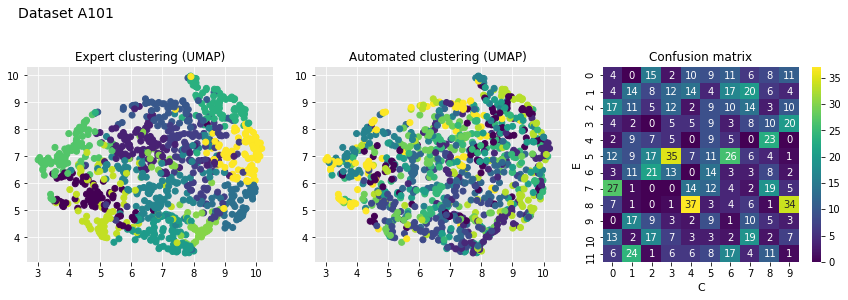


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
0,"(0, 2, 4, 5, 6, 7, 8, 9)",0.606280
1,"(1, 2, 3, 4, 6, 7)",0.579610
2,"(0, 1, 2, 3, 5, 6, 7, 9)",0.610438
3,"(0, 3, 4, 5, 7, 8, 9)",0.474498
4,"(1, 2, 5, 6, 8)",0.465785
5,"(0, 1, 2, 3, 5, 6)",0.553339
6,"(1, 2, 3, 5, 8)",0.645081
7,"(0, 4, 5, 8)",0.678911
8,"(0, 4, 9)",0.718488
9,"(1, 2, 5, 7, 8)",0.616827



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity
2,1,2,0.807262
5,2,10,0.802065



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's



,C1,C2,similarity
,C1,C2,similarity
2,1,2,0.814757
5,2,10,0.808508
,C1,C2,similarity
2,1,2,0.803417
,C1,C2,similarity
,C1,C2,similarity
7,6,9,0.806242


In [16]:
E101 = KMeans(n_clusters=12, random_state=random_state).fit_predict(X101)
df101 = myPlot2(X101, Y101, E101, dataset_name='A101')
_ = test_splitmerge_without_plot(df101, X101, Y101, E101, 'A101')

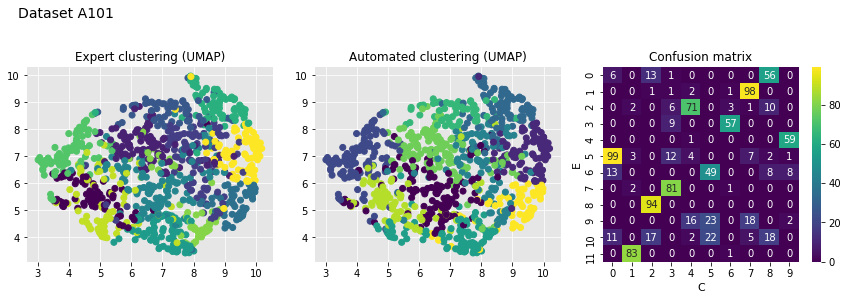


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
9,"(4, 5, 7)",0.685766
10,"(0, 2, 5, 8)",0.643642
,clusters,confidence
10,"(5, 8)",0.885865
,clusters,confidence
9,"(4, 5, 7)",0.590958
10,"(0, 2, 5, 8)",0.567424



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's



,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity


In [17]:
A101 = KMeans(n_clusters=10, random_state=random_state).fit_predict(X101)
df101_A = myPlot2(X101, A101, E101, dataset_name='A101')
_ = test_splitmerge_without_plot(df101_A, X101, A101, E101, 'A101')

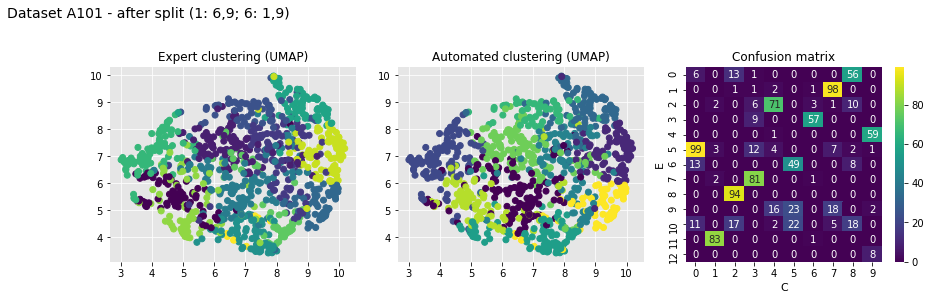


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
9,"(4, 5, 7)",0.685401
10,"(0, 2, 5, 8)",0.643487
,clusters,confidence
10,"(5, 8)",0.886127
,clusters,confidence
9,"(4, 5, 7)",0.590911
10,"(0, 2, 5, 8)",0.567539



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity
5,4,12,0.999856



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's



,C1,C2,similarity
5,4,12,0.916489
,C1,C2,similarity
5,4,12,0.971986
,C1,C2,similarity
5,4,12,0.987089
,C1,C2,similarity
5,4,12,0.923089
,C1,C2,similarity
5,4,12,0.960223


In [18]:
E101_s1 = split(E101, A101, row=1, col1=6, col2=9)
E101_s1s2 = split(E101_s1, A101, row=6, col1=1, col2=9)
df101_A = myPlot2(X101, A101, E101_s1s2, dataset_name='A101 - after split (1: 6,9; 6: 1,9)')
_ = test_splitmerge_without_plot(df101_A, X101, A101, E101_s1s2, 'A101 - after split')